In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dat200-ca3-2023/sample_submission.csv
/kaggle/input/dat200-ca3-2023/train.csv
/kaggle/input/dat200-ca3-2023/test.csv


# 1. Data Cleaning

In [3]:
raw_train = pd.read_csv('/kaggle/input/dat200-ca3-2023/train.csv')
raw_test = pd.read_csv('/kaggle/input/dat200-ca3-2023/test.csv')

In [4]:
raw_train.set_index('Unnamed: 0', inplace=True)
raw_test.set_index('Unnamed: 0', inplace=True)

In [5]:
print(f'Train Data Shape: {raw_train.shape}')
raw_train.head(5)

Train Data Shape: (2040, 10)


ph    Hardness        Solids  Chloramines     Sulfate  \
Unnamed: 0                                                                
0           8.699665  206.379671  20051.663488     7.725750  360.083725   
1           6.563410  175.697020  16117.048403     6.084136  333.778060   
2           6.817023  246.660238  19537.573853     9.051732  317.237871   
3           7.449572  146.902210  19924.425670     7.950549  444.198272   
4           5.300541  212.435573  12624.741570     7.313756  350.452182   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
Unnamed: 0                                                             
0             408.388221       14.859047        76.846364   5.710412   
1             412.632708       11.222295        73.502793   4.459252   
2             464.209418       14.822665        68.918597   4.602564   
3             554.679850       19.483985        72.081011   3.809883   
4             356.512171       19.213205        99.351837   3.841719   

            Drinkable  
Unnamed: 0             
0                   0  
1                   1  
2                   0  
3                   0  
4                   1

In [6]:
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2039
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2040 non-null   float64
 1   Hardness         2040 non-null   float64
 2   Solids           2040 non-null   float64
 3   Chloramines      2040 non-null   float64
 4   Sulfate          2040 non-null   float64
 5   Conductivity     2040 non-null   float64
 6   Organic_carbon   2040 non-null   float64
 7   Trihalomethanes  2040 non-null   float64
 8   Turbidity        2040 non-null   float64
 9   Drinkable        2040 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 175.3 KB


In [7]:
raw_test.head(5)

ph    Hardness        Solids  Chloramines     Sulfate  \
Unnamed: 0                                                                 
0            6.291652  186.073761  13205.680697     6.045361  367.989091   
1            4.884432  106.394326  10724.202982     5.549662  369.764389   
2            5.488289  186.185584  29818.481906     6.609243  353.107564   
3            9.384693  155.312737  11090.583566     3.878989  389.735129   
4           11.438159  186.621075  26987.644607     8.042822  328.019302   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Unnamed: 0                                                            
0             295.308581       11.170456        49.785878   5.328826  
1             299.468182       12.333352        77.101277   4.285049  
2             344.806801       19.386249        65.179697   2.372528  
3             504.336229       17.829793        64.215950   2.972796  
4             402.359564       18.345715        44.955298   3.816719

In [8]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               360 non-null    float64
 1   Hardness         360 non-null    float64
 2   Solids           360 non-null    float64
 3   Chloramines      360 non-null    float64
 4   Sulfate          360 non-null    float64
 5   Conductivity     360 non-null    float64
 6   Organic_carbon   360 non-null    float64
 7   Trihalomethanes  360 non-null    float64
 8   Turbidity        360 non-null    float64
dtypes: float64(9)
memory usage: 28.1 KB


In [9]:
raw_train.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Drinkable          0
dtype: int64

In [10]:
raw_test.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [11]:
raw_train.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2040.000000  2040.000000   2040.000000  2040.000000  2040.000000   
mean      7.045930   195.998874  22005.555875     7.111529   333.349677   
std       1.597071    34.284142   8683.483885     1.616997    45.805572   
min       0.216124    69.817622    336.989742     1.321327   171.196409   
25%       6.033722   174.968973  15566.304215     6.111137   304.722266   
50%       6.958491   197.260049  20977.941519     7.098779   335.207355   
75%       7.998105   216.784623  26971.346790     8.078323   360.990547   
max      14.700000   301.471218  58101.437939    13.286030   483.112422   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity    Drinkable  
count   2040.000000     2040.000000      2040.000000  2040.000000  2040.000000  
mean     424.783924       14.240333        66.311518     3.964849     0.500000  
std       83.757539        3.455875        16.485962     0.792210     0.500123  
min      191.538750        2.090000         8.148162     1.417596     0.000000  
25%      361.944320       11.829769        55.539686     3.423092     0.000000  
50%      419.621502       14.224112        66.318316     3.957272     0.500000  
75%      481.204843       16.665868        77.048602     4.487263     1.000000  
max      791.009751       28.357042       126.031581     6.819486     1.000000

In [75]:
Q1 = raw_train.quantile(q=0.20)
Q3 = raw_train.quantile(q=0.80)
IQR = Q3 - Q1

df1 = raw_train[~((raw_train < (Q1 - 1.5*IQR)) | (raw_train > (Q3 + 1.5*IQR))).any(axis=1)]

print(f"original Shape: {raw_train.shape}")
print(f"New Shape: {df1.shape}")

original Shape: (2040, 10)
New Shape: (1991, 10)


# 2. PLOTTING

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns

#### Pair Plot

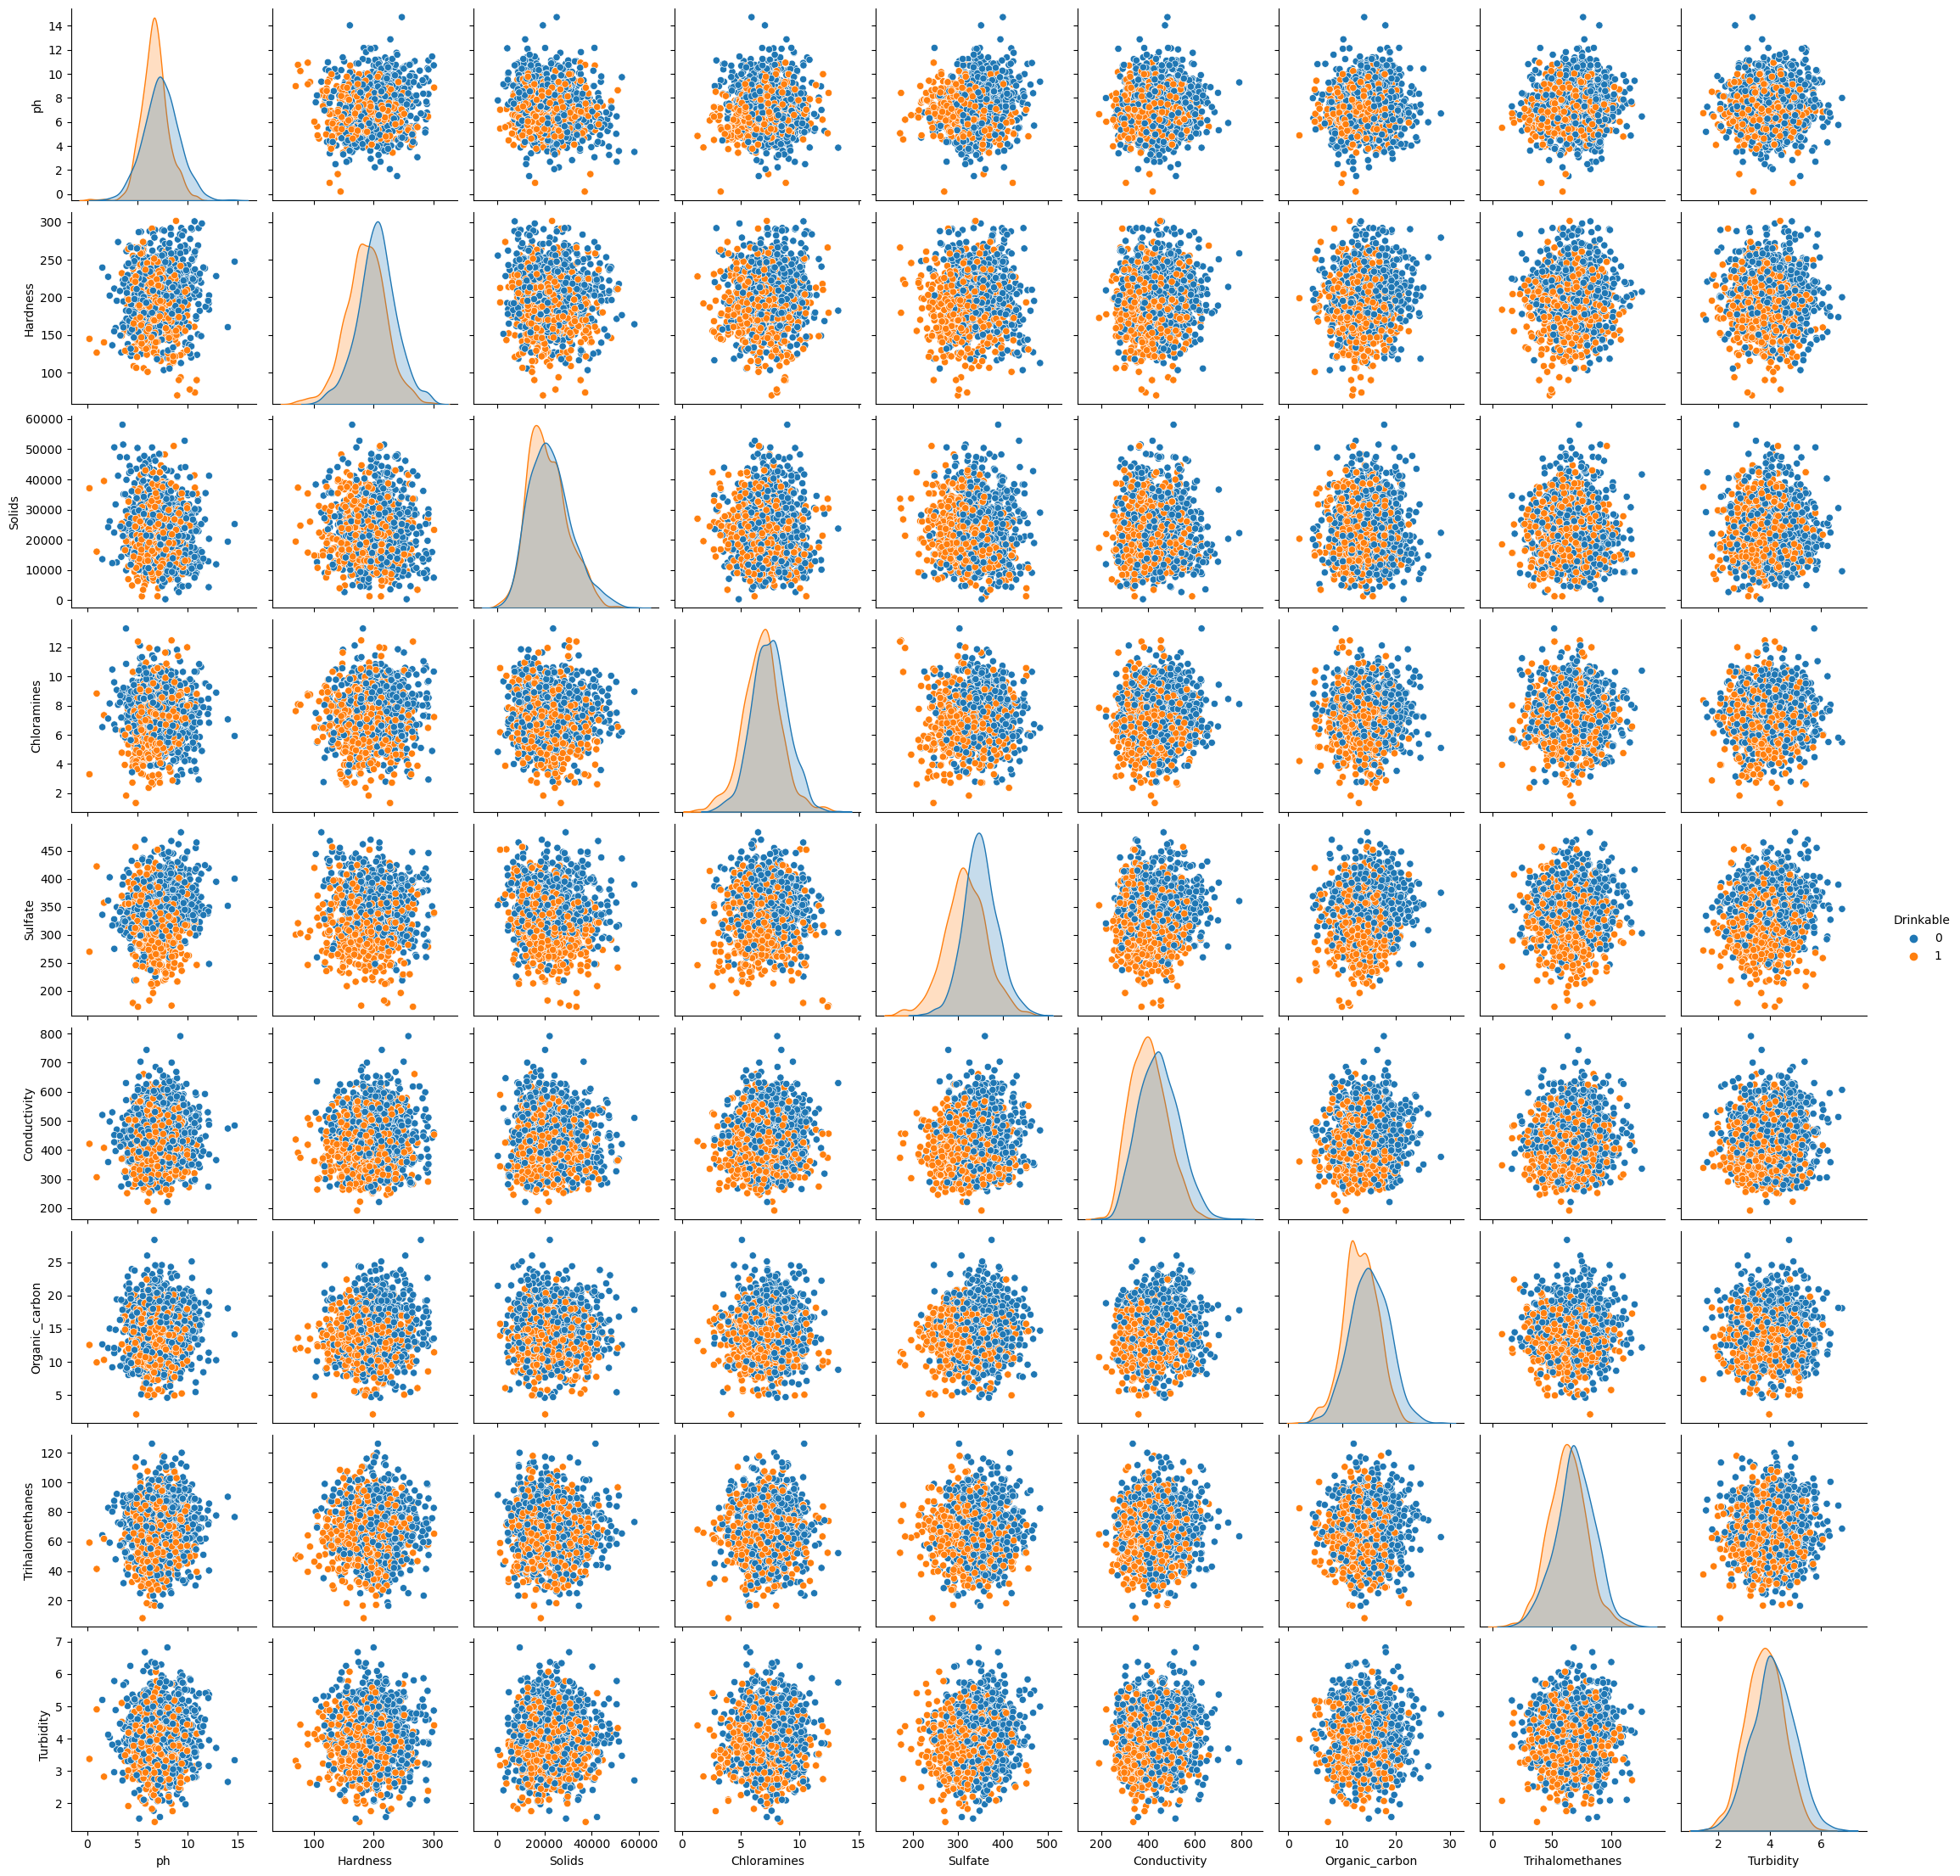

In [13]:
# sns.pairplot(raw_train, hue="Drinkable")

#### Violin Plot

<AxesSubplot:>

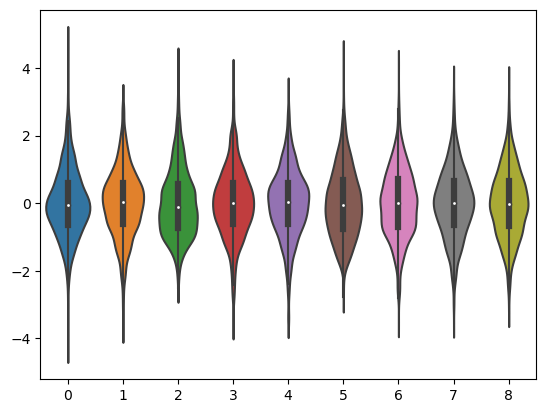

In [14]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X = raw_train.iloc[:,:-1]
# X_std = sc.fit_transform(X)
# sns.violinplot(X_std)

#### Correlation Plot

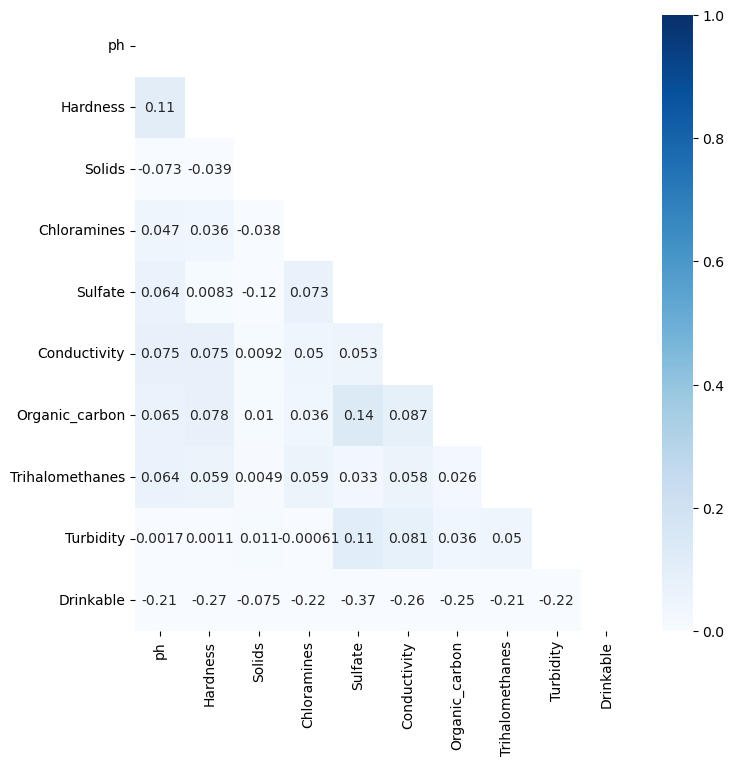

In [15]:
# corr = raw_train.corr()
# mask = np.triu(corr)

# plt.figure(figsize=(8,8))
# sns.heatmap(corr, mask=mask, annot=True, cmap="Blues", vmin=0.0, vmax=1.0)
# plt.show()

## 3. ML MODEL -

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [85]:
X = raw_train.iloc[:, :-1]
y = raw_train.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, stratify=y, test_size=0.3, shuffle=True)

print(X_train.shape)
print(X_test.shape)
X_train

(1428, 9)
(612, 9)


ph    Hardness        Solids  Chloramines     Sulfate  \
Unnamed: 0                                                                
49          7.662072  165.414555  20297.969418     7.116397  299.421385   
1386        5.837521  200.430760  18982.249428     8.743433  257.542249   
1212        6.636394  174.112623  21505.724174     7.986256  372.003487   
1113        9.097174  217.269322  31028.900855     6.331789  355.983880   
574         8.941776  222.919860  29981.237431     7.586634  359.734287   
...              ...         ...           ...          ...         ...   
418         3.905781  261.302231  24770.478735     8.067929  369.133256   
82          7.795273  194.432537  16543.794592     6.497641  262.931593   
602         9.381872  229.313757  24962.971193     6.735594  341.086926   
1938        4.159458  181.681123  25229.825676     8.405913  410.552415   
1901        6.300430  191.586436  22953.192230     7.566299  351.140506   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Unnamed: 0                                                            
49            472.168273       10.846168        43.902538   3.568572  
1386          315.968220       16.328565        75.652530   2.927976  
1212          443.458101       15.533658        48.345218   2.865048  
1113          346.196381        9.596899        66.954049   3.873703  
574           358.827362        9.453829        63.761462   2.273966  
...                  ...             ...              ...        ...  
418           448.870728       21.413471        40.535184   2.854318  
82            329.213692       11.880321        79.720912   4.873051  
602           433.655086       14.123109        66.758283   5.426713  
1938          467.033991       20.942544        62.826268   4.297614  
1901          329.517384       16.181922        58.145196   3.216980  

[1428 rows x 9 columns]

In [103]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_train_std

array([[ 0.38234691, -0.84786165, -0.21126758, ..., -0.96285589,
        -1.31967085, -0.50501949],
       [-0.74831716,  0.16147774, -0.36208195, ...,  0.63858382,
         0.58097562, -1.3107826 ],
       [-0.25326004, -0.59714053, -0.07282871, ...,  0.40638683,
        -1.05371917, -1.38993591],
       ...,
       [ 1.44809714,  0.99402788,  0.32345816, ..., -0.00564271,
         0.04854026,  1.83221327],
       [-1.78820317, -0.3789791 ,  0.35404635, ...,  1.98635339,
        -0.18684158,  0.41199456],
       [-0.46145509, -0.0934592 ,  0.09308729, ...,  0.59574838,
        -0.46706407, -0.94726461]])

In [87]:
ppn = Perceptron(eta0=0.001, max_iter=1000, random_state=123)
ppn.fit(X_train_std, y_train)
y_pred_train = ppn.predict(X_train_std)
y_pred_test = ppn.predict(X_test_std)
print(f"Perceptron Accuracy Train Score: {accuracy_score(y_train, y_pred_train)}")
print(f"Perceptron Accuracy Test Score: {accuracy_score(y_test, y_pred_test)}")

Perceptron Accuracy Train Score: 0.6939775910364145
Perceptron Accuracy Test Score: 0.7189542483660131


In [88]:
lr = LogisticRegression(random_state=123, tol=1e-04, penalty="l2", solver='lbfgs', C=0.01)
lr.fit(X_train_std, y_train)
y_pred_train = lr.predict(X_train_std)
y_pred_test = lr.predict(X_test_std)
print(f"Logistic Accuracy Train Score: {accuracy_score(y_train, y_pred_train)}")
print(f"Logistic Accuracy Test Score: {accuracy_score(y_test, y_pred_test)}")

Logistic Accuracy Train Score: 0.7997198879551821
Logistic Accuracy Test Score: 0.7924836601307189


In [142]:
svc = SVC(C=0.15, kernel="rbf", gamma=0.1, tol=1e-04, random_state=123)
svc.fit(X_train_std, y_train)
y_pred_train = svc.predict(X_train_std)
y_pred_test = svc.predict(X_test_std)
print(f"SVC Accuracy Train Score: {accuracy_score(y_train, y_pred_train)}")
print(f"SVC Accuracy Test Score: {accuracy_score(y_test, y_pred_test)}")

SVC Accuracy Train Score: 0.8389355742296919
SVC Accuracy Test Score: 0.8218954248366013


In [91]:
dtree = DecisionTreeClassifier(criterion="gini", random_state=123, max_depth=None)
dtree.fit(X_train_std, y_train)
y_pred_train = dtree.predict(X_train_std)
y_pred_test = dtree.predict(X_test_std)
print(f"Decision Tree Accuracy Train Score: {accuracy_score(y_train, y_pred_train)}")
print(f"Decision Tree Accuracy Test Score: {accuracy_score(y_test, y_pred_test)}")

Decision Tree Accuracy Train Score: 1.0
Decision Tree Accuracy Test Score: 0.8349673202614379


In [92]:
rf = RandomForestClassifier(n_estimators=50, criterion="gini", random_state=123, max_depth=None)
rf.fit(X_train_std, y_train)
y_pred_train = rf.predict(X_train_std)
y_pred_test = rf.predict(X_test_std)
print(f"Random Forest Accuracy Train Score: {accuracy_score(y_train, y_pred_train)}")
print(f"Random Forest Accuracy Test Score: {accuracy_score(y_test, y_pred_test)}")

Random Forest Accuracy Train Score: 1.0
Random Forest Accuracy Test Score: 0.8513071895424836


# 4. FINAL MODEL

In [94]:
X_f_test = raw_test.iloc[:,:]

In [95]:
sc1 = StandardScaler()
sc1.fit(X)
X_std = sc1.transform(X)
X_f_std = sc1.transform(X_f_test)

In [99]:
X_train_std = sc.transform(X_train)
X_f_test_std = sc.transform(X_f_test)

In [143]:

svc = SVC(C=0.15, kernel="rbf", gamma=0.1, tol=1e-04, random_state=123)
svc.fit(X_train_std, y_train)
y_pred = svc.predict(X_f_test_std)

# rf = RandomForestClassifier(n_estimators=50, criterion="gini", random_state=123, max_depth=None)
# rf.fit(X_std, y)
# y_pred = rf.predict(X_f_std)

pred_df = pd.DataFrame({"index": raw_test.index, "Drinkable": y_pred})
# pred_df.reset_index(inplace=True)
pred_df.to_csv("submission.csv", index=False)
                    
                       

In [68]:
pred_df

index  Drinkable
0        0          1
1        1          1
2        2          1
3        3          0
4        4          0
..     ...        ...
355    355          0
356    356          0
357    357          0
358    358          1
359    359          1

[360 rows x 2 columns]